# Ranked evaluation
**Task**: Calculate precision and recall for ranked results

When dealing with ranked results, the position of True Positive answers in the ranking is important, because we want to have correct results in the top positions of ranking

In [1]:
import json
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import spacy
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Embedding docs and search

In [2]:
dataset_file = '../data/wiki_dataset.json'
with open(dataset_file, 'r') as infile:
    dataset = json.load(infile)
docs = dataset['docs']
queries = dataset['queries']
nlp = spacy.load("en_core_web_sm")
tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE'] and not x.is_stop]

In [3]:
V = CountVectorizer()
tf_idf = TfidfTransformer(use_idf=True)

In [5]:
pseudo_docs = [" ".join(tokens(doc)) for doc in docs]

In [6]:
X = tf_idf.fit_transform(V.fit_transform(pseudo_docs))

In [7]:
X.shape

(3128, 22031)

### Process queries

In [8]:
query_texts = [(query, " ".join(tokens(query))) for query in queries.keys()]

In [9]:
q_matrix = tf_idf.transform(V.transform([y for x, y in query_texts]))

In [10]:
q_matrix

<29x22031 sparse matrix of type '<class 'numpy.float64'>'
	with 62 stored elements in Compressed Sparse Row format>

In [192]:
q_index = 11
query_texts[q_index]

('democratic party (united states)', 'democratic party united state')

## Matching the original data

In [193]:
from sklearn.metrics.pairwise import cosine_similarity

In [194]:
matching = cosine_similarity(q_matrix, X)

In [195]:
matching.shape

(29, 3128)

### Get ranking

In [196]:
answers = [(x, y) for x, y in sorted(enumerate(matching[q_index]), key=lambda x: -x[1])]

In [197]:
expected = set(queries[query_texts[q_index][0]])

In [198]:
for answer, score in answers:
    print(answer, score, answer in expected)

2560 0.4083560221506487 True
1042 0.3261660827074844 True
140 0.320430158474426 True
1039 0.27148977173854827 True
482 0.2695662949734421 True
2437 0.2660423185206877 False
1347 0.25652836910712695 True
602 0.2451129487468765 True
1980 0.24509073523372366 True
1802 0.23421730552388162 True
1658 0.22908360987779963 True
2499 0.22735953677245976 False
1974 0.22592121572780163 False
2091 0.21533048800332147 False
396 0.21269265797520429 True
2340 0.20867318465183787 True
2064 0.20815113114953498 False
2556 0.2007814050172318 True
3044 0.19844023870884608 False
1065 0.19556073005976365 True
206 0.19324131042337134 True
793 0.19235862791051578 False
842 0.18895182441698907 False
2438 0.18732954802232182 True
2524 0.1847878069658289 False
2053 0.18367439699535565 False
1274 0.17757907234684805 False
1779 0.17636273014558834 False
324 0.16971082160340045 True
1329 0.16777808384321927 False
2841 0.16776129781475313 False
1496 0.16688103783624914 False
865 0.15111705176437917 True
1719 0.146186

1330 0.019569285411560236 False
2165 0.019500311333611263 False
2398 0.019385818272016835 False
1193 0.019213505372833856 False
800 0.019078180153440986 False
13 0.01868824467590399 False
923 0.01866164613314883 False
1957 0.018479356300760544 False
1665 0.018465569477232924 False
2172 0.018426232334859478 False
788 0.018310824394016493 False
2323 0.01812806678319309 False
2102 0.017998430103647545 True
2166 0.017889592346776277 False
2021 0.017881667895010344 True
1151 0.01775297442138222 False
2937 0.017738764769567105 False
3064 0.017551382926033844 False
30 0.017457600624222316 False
1875 0.017135139847991757 False
2353 0.017106159828826767 False
2085 0.016756052132785863 False
935 0.016696309973210144 False
1637 0.01651900189728381 False
1014 0.016401014209109162 False
2687 0.016196767249770143 False
1260 0.016141641530973663 False
954 0.01581879929852884 False
792 0.01563595925220227 False
110 0.015617963537039857 False
1682 0.015429205562472317 False
2847 0.015147616608894316 Fa

1158 0.0 False
1160 0.0 False
1162 0.0 False
1163 0.0 False
1164 0.0 False
1165 0.0 False
1166 0.0 False
1167 0.0 False
1168 0.0 False
1169 0.0 False
1170 0.0 False
1171 0.0 False
1172 0.0 False
1173 0.0 False
1174 0.0 False
1175 0.0 False
1176 0.0 False
1178 0.0 False
1179 0.0 False
1180 0.0 False
1181 0.0 False
1182 0.0 False
1183 0.0 False
1184 0.0 False
1186 0.0 False
1187 0.0 False
1188 0.0 False
1189 0.0 False
1190 0.0 False
1191 0.0 False
1192 0.0 False
1194 0.0 False
1196 0.0 False
1198 0.0 False
1199 0.0 False
1200 0.0 False
1201 0.0 False
1202 0.0 False
1203 0.0 False
1204 0.0 False
1205 0.0 False
1206 0.0 False
1207 0.0 False
1208 0.0 False
1210 0.0 False
1211 0.0 False
1214 0.0 False
1215 0.0 False
1217 0.0 False
1219 0.0 False
1220 0.0 False
1221 0.0 False
1224 0.0 False
1227 0.0 False
1228 0.0 False
1229 0.0 False
1231 0.0 False
1232 0.0 False
1233 0.0 False
1234 0.0 False
1235 0.0 False
1236 0.0 False
1237 0.0 False
1239 0.0 False
1240 0.0 False
1241 0.0 False
1242 0.0 F

1959 0.0 False
1960 0.0 False
1961 0.0 False
1963 0.0 False
1964 0.0 False
1966 0.0 False
1967 0.0 False
1969 0.0 False
1970 0.0 False
1971 0.0 False
1973 0.0 False
1975 0.0 False
1976 0.0 False
1978 0.0 False
1979 0.0 False
1981 0.0 False
1982 0.0 False
1983 0.0 False
1984 0.0 False
1985 0.0 False
1986 0.0 False
1987 0.0 False
1988 0.0 False
1989 0.0 False
1990 0.0 False
1991 0.0 False
1992 0.0 False
1993 0.0 False
1994 0.0 False
1995 0.0 False
1996 0.0 False
1997 0.0 False
1998 0.0 False
1999 0.0 False
2000 0.0 False
2001 0.0 False
2002 0.0 False
2003 0.0 False
2004 0.0 False
2007 0.0 False
2008 0.0 False
2009 0.0 False
2010 0.0 False
2012 0.0 False
2015 0.0 False
2016 0.0 False
2017 0.0 False
2018 0.0 False
2019 0.0 False
2020 0.0 False
2022 0.0 False
2023 0.0 False
2024 0.0 False
2025 0.0 False
2026 0.0 False
2027 0.0 False
2028 0.0 False
2029 0.0 False
2030 0.0 False
2032 0.0 False
2033 0.0 False
2034 0.0 False
2035 0.0 False
2036 0.0 False
2037 0.0 False
2038 0.0 False
2039 0.0 F

2756 0.0 False
2757 0.0 False
2758 0.0 False
2759 0.0 False
2760 0.0 False
2762 0.0 False
2763 0.0 False
2764 0.0 False
2765 0.0 False
2766 0.0 False
2767 0.0 False
2768 0.0 False
2769 0.0 False
2770 0.0 False
2771 0.0 False
2772 0.0 False
2774 0.0 False
2775 0.0 False
2776 0.0 False
2777 0.0 False
2778 0.0 False
2780 0.0 False
2782 0.0 False
2784 0.0 False
2785 0.0 False
2787 0.0 False
2789 0.0 False
2790 0.0 False
2791 0.0 False
2792 0.0 False
2793 0.0 False
2794 0.0 False
2795 0.0 False
2797 0.0 False
2799 0.0 False
2800 0.0 False
2801 0.0 False
2802 0.0 False
2803 0.0 False
2804 0.0 False
2805 0.0 False
2806 0.0 False
2807 0.0 False
2809 0.0 False
2810 0.0 False
2811 0.0 False
2812 0.0 False
2813 0.0 False
2814 0.0 False
2815 0.0 False
2816 0.0 False
2817 0.0 False
2819 0.0 False
2820 0.0 False
2821 0.0 False
2823 0.0 False
2824 0.0 False
2825 0.0 False
2826 0.0 False
2827 0.0 False
2829 0.0 False
2830 0.0 False
2831 0.0 False
2832 0.0 False
2833 0.0 False
2834 0.0 False
2835 0.0 F

## Ranked results evaluation
When evaluating precision and recall, we have to deal with three main quantities:
1. **True Positive (TP)**: documents retrieved and expected
2. **False Positive (FP)**: document retrieved but not expected
3. **False Negative (FN)**: document expected but not retrieved

True Negative are not relevant for calculating Precision and Recall. The idea of ranked results evaluation is to examine the ranking one document at a time from the top of the ranking and to update precision and recall for each document (at different levels of scores).

In [199]:
statistics = []
TP, FP, FN = 0, 0, len(expected)
for i, (answer, score) in enumerate(answers):
    if answer in expected:
        TP += 1
        if FN > 0:
            FN -= 1
    else:
        FP += 1
    statistics.append({
        'ranking': i,
        'TP': TP, 'FP': FP, 'FN': FN,
        'score': score, 
        'precision': TP / (TP + FP), 
        'recall': TP / (TP + FN)
    })
S = pd.DataFrame(statistics)

In [200]:
S

,ranking,TP,FP,FN,score,precision,recall
0,0,1,0,83,0.408356,1.000000,0.011905
1,1,2,0,82,0.326166,1.000000,0.023810
2,2,3,0,81,0.320430,1.000000,0.035714
3,3,4,0,80,0.271490,1.000000,0.047619
4,4,5,0,79,0.269566,1.000000,0.059524
...,...,...,...,...,...,...,...
3123,3123,84,3040,0,0.000000,0.026889,1.000000
3124,3124,84,3041,0,0.000000,0.026880,1.000000
3125,3125,84,3042,0,0.000000,0.026871,1.000000
3126,3126,84,3043,0,0.000000,0.026863,1.000000


## Precision-Recall plot

In [201]:
import matplotlib.pyplot as plt

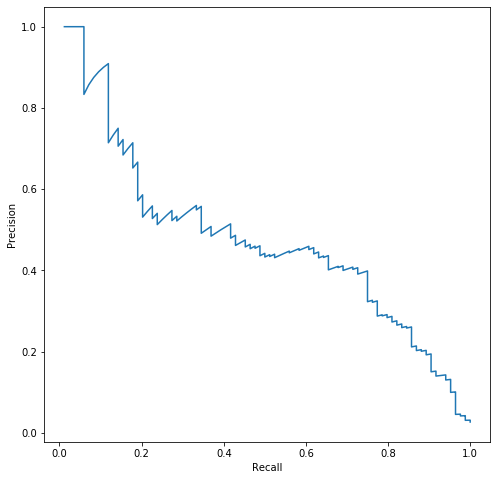

In [202]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(S.recall.values, S.precision.values)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()

Numerical fluctuation in the plot is due to the fact that precison values changes for each single document. In order to evaluate the best precision values achieved at a given value of recall, we exploit **interpolated precision**, defined as:

$$
ip(r) = \max\limits_{r' \geq r} p(r')
$$

In [203]:
precision, recall = S.precision.values, S.recall.values
ip = np.zeros(len(recall))
for i, r in enumerate(recall):
    ip[i] = precision[i:].max()

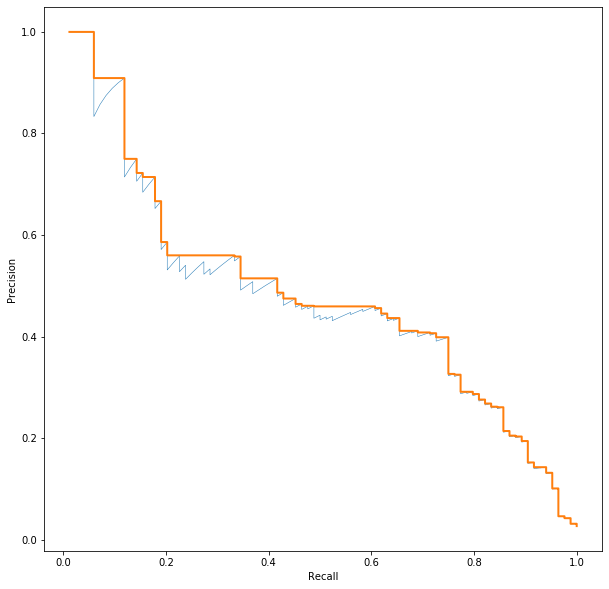

In [204]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S.recall.values, S.precision.values, linewidth=.5, label='Precision')
ax.plot(S.recall.values, ip, linewidth=2, label='Interpolated')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()

## Sklearn metrics

In [205]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [206]:
y_true, y_scores = [], []
for answer, score in answers:
    y_scores.append(score)
    if answer in expected:
        y_true.append(1)
    else:
        y_true.append(0)

In [207]:
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [208]:
print(precision[:10])
print(recall[:10])
print(thresholds[:10])

[0.02685422 0.12861736 0.12882448 0.12903226 0.12924071 0.12944984
 0.12965964 0.12987013 0.1300813  0.13029316]
[1.         0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 0.95238095 0.95238095 0.95238095 0.95238095]
[0.         0.0020038  0.00556082 0.00566535 0.00679116 0.00794252
 0.00802713 0.00811675 0.00817074 0.00839273]


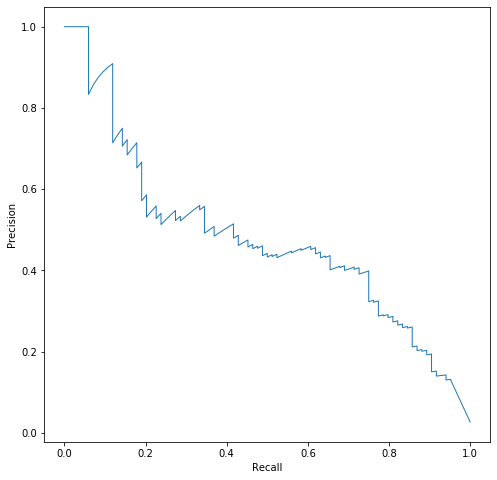

In [209]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(recall, precision, linewidth=1)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()

### Receiver operating characteristic
Another popolar way of evaluating ranked results is to plot the **Receiver operating characteristic (ROC)** curve. This is calcuated by plotting the **true positive rate (TPR)** against the **false positive rate (FPR)**, where:

$$
TPR = \frac{TP}{TP + FN},\ \  FPR = \frac{FP}{FP + TN}
$$

In [210]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

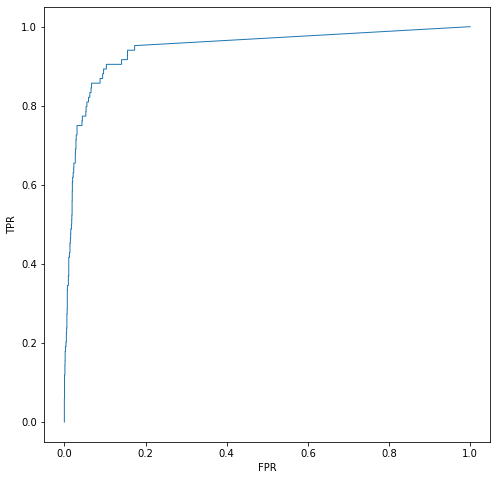

In [211]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr, tpr, linewidth=1)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.show()

The area under the ROC curve, gives a synthetic measure of the quality of the system

In [212]:
roc_auc_score(y_true, y_scores)

0.9450128277329328